# Shapes
Images of shapes used to test digital image processing functions. 
In Python an image is usually represented as a two-dimensional array so in order to build an image of a geometric shape we have to compute the coordinates x and y of the shape as integer values for the rows and columns of the pixels and give to those points a value, e.g. 0 for black and 255 for white. This notebook contains the functions for lines and circles. Being images two-dimensional arrays, images of lines and circles can be added multiple times to one image if the size of all the images are the same.

In [3]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

## Line
The reference system used is with the origin at the upper left corner of the image. The horizontal axes X represent the columns
and the vertical axes, from the origin down to the bottom of the image, represents the rows.

In [63]:
def dip_line(x1, y1, x2, y2, M, N):
    '''
    Creates an MxN image of a line segment given its two endpoints (x1, y1) and (x2, y2)
    1) Computes the value of the slope and intercept
    2) Computes the value of the segment's x and y as integer variables
    3) Creates a 2-dimensional array of points (x, y) of the line
    4) Creates a two-dimensional array of the image
    5) Adds the points to the empty image
    6) Returns the image
    '''
    num_pixels = np.absolute(x2 - x1) * 4
    
    X = np.linspace(x1, x2, num_pixels)
    slope = (y2 - y1) / (x2 - x1)
    intercept = y2 - slope * x2
    Y = slope * X + intercept
    
    X = np.rint(X).astype(int) # row index of the line's pixels in the image two-dimensional array
    Y = np.rint(Y).astype(int) # column index of the line's pixels in the image two dimensional array
    
    image = np.zeros((M, N), dtype='int') 
    for i in range(0, X.shape[0]):
        row = Y[i]
        col = X[i]
        image[row, col] = 255
    
    return image

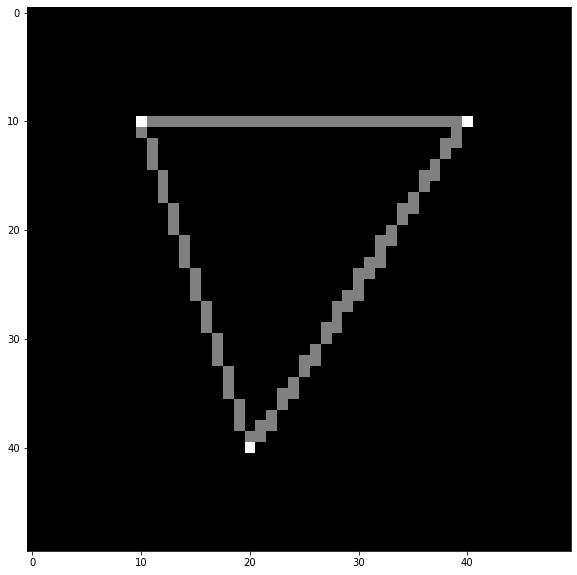

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
M = 50
N = 50
line1 = dip_line(10, 10, 20, 40, M, N)
line2 = dip_line(10, 10, 40, 10, M, N)
line3 = dip_line(20, 40, 40, 10, M, N)
lines = line1 + line2 + line3
ax.imshow(lines, cmap=cm.gray)

In [65]:
np.sum(lines > 256)

3

## Circle

In [51]:
def dip_circle(a, b, r, M, N):
    '''
    Creates an MxN image of a circular shape given its center (a,b) and radius r.
    a, b and r are given in number of pixels.
    1) Computes the value of the x and y as integer variables
    2) Creates a 2-dimensional array of points (x, y) of the circle
    3) Creates a two-dimensional array of the image
    4) Adds the points to the empty image
    5) Returns the image
    '''
    num_pixels = max(r, 360) 
    theta = np.linspace(-np.pi, np.pi, num_pixels)

    X = a + r * np.cos(theta)
    Y = b + r * np.sin(theta)
    X = np.rint(X).astype(int) # row index of the circle's pixels in the image two-dimensional array
    Y = np.rint(Y).astype(int) # column index of the circle's pixels in the image two dimensional array
    
    image = np.zeros((M, N))
    for i in range(0, X.shape[0]):
        row = Y[i]
        col = X[i]
        image[row, col] = 255
    return image

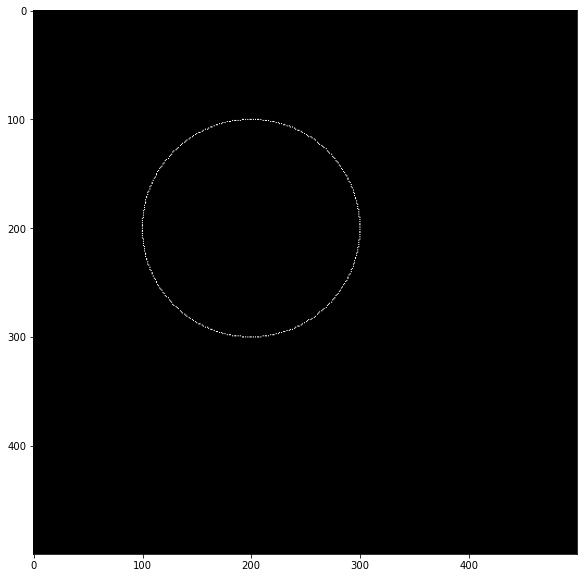

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
circle = dip_circle(200, 200, 100, 500, 500)
ax.imshow(circle, cmap=cm.gray)